In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
 .messagebox{
     border-radius: 2px;
     padding: 1.25em 1.5em;
     border: 1px solid;
 }
.messagelightgreen{
     border-color: hsl(164deg 95% 38%);
     color: rgb(5 139 102);
     background-color: rgb(236 255 250);
 }
 .messagelightgreen b{
     color:rgb(139 77 5);
 }
 .messagebrown{
     border-color: hsl(35deg 96% 62%);
    color: rgb(143 84 4);
    background-color: rgb(255 245 234);
 }
 .messagebrown b{
     color: rgb(5 139 102);
 }
</style>"""))

In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import scipy.stats as stats

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import plotly.express as px

In [9]:
from scipy import signal, interpolate

In [10]:
from sklearn.decomposition import FastICA

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [17]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
%matplotlib inline

In [20]:
plt.style.use('ggplot')

In [21]:
df = pd.read_csv('EEG-Eye-State-Classification.csv')

In [22]:
df.shape

(14980, 15)

In [23]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Rows Available in Dataset <b>{0}</b></h6>".format(df.shape[0])))

In [24]:
display(HTML("<h6 class='messagebox messagelightgreen'>No of Columns Available in Dataset <b>{0}</b></h6>".format(df.shape[1])))

In [25]:
ds_columns = df.columns.tolist()[:-1]

In [26]:
df.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0

In [27]:
df.tail()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51             1  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33             1  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49             1  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77             1  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77             1

In [28]:
df.sample(10)

AF3       F7       F3      FC5       T7       P7       O1       O2  \
5294   4342.56  3974.87  4278.46  4122.56  4351.79  4630.77  4076.41  4603.59   
5729   4296.92  4011.28  4265.13  4136.92  4343.59  4622.05  4082.05  4600.00   
9472   4282.05  3983.59  4248.21  4102.05  4338.46  4623.08  4056.92  4595.90   
8748   4291.79  3990.26  4245.64  4094.87  4325.13  4609.74  4054.36  4621.54   
5329   4344.62  3992.31  4266.67  4123.08  4355.90  4626.15  4079.49  4612.31   
12060  4272.31  4041.03  4281.03  4151.79  4376.41  4652.31  4112.82  4657.95   
9231   4333.33  4064.62  4260.51  4151.28  4354.87  4616.92  4057.95  4611.79   
2375   4280.51  3983.08  4248.21  4117.95  4328.21  4607.69  4071.79  4601.54   
8449   4260.00  3954.87  4242.05  4100.00  4321.54  4604.62  4050.77  4609.74   
9613   4272.82  3957.95  4248.21  4087.18  4333.33  4616.41  4044.62  4612.31   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
5294   4193.85  4260.51  4217.95  4290.26  4636.92  4402.05             1  
5729   4196.41  4232.82  4194.36  4275.90  4599.49  4338.97             1  
9472   4194.87  4229.23  4202.56  4258.46  4601.54  4351.28             0  
8748   4204.10  4242.56  4203.08  4274.87  4596.92  4357.44             1  
5329   4200.51  4250.26  4209.74  4291.79  4617.44  4387.69             1  
12060  4227.18  4242.05  4204.62  4287.69  4605.13  4325.13             1  
9231   4191.28  4225.13  4220.00  4282.05  4606.15  4372.31             0  
2375   4200.51  4242.05  4194.36  4278.97  4612.82  4356.41             1  
8449   4174.36  4209.23  4180.51  4258.46  4563.59  4320.00             1  
9613   4184.10  4225.13  4197.44  4260.00  4584.62  4333.33             0

In [29]:
df[0:2].T

0        1
AF3           4329.23  4324.62
F7            4009.23  4004.62
F3            4289.23  4293.85
FC5           4148.21  4148.72
T7            4350.26  4342.05
P7            4586.15  4586.67
O1            4096.92  4097.44
O2            4641.03  4638.97
P8            4222.05  4210.77
T8            4238.46  4226.67
FC6           4211.28  4207.69
F4            4280.51  4279.49
F8            4635.90  4632.82
AF4           4393.85  4384.10
eyeDetection     0.00     0.00

In [30]:
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
train_value_counts = df["eyeDetection"].value_counts()

In [33]:
px.bar(train_value_counts, x=train_value_counts.index, y = train_value_counts.values, 
           color=train_value_counts.index, title="Train Dataset Eye Detection Wise Count",
          labels={'y': "Record Count", 'index': "Eye Detection"}, color_discrete_sequence=px.colors.qualitative.G10)

In [34]:
t = np.arange(0, len(df) * 1 / 128, 1/128)

In [35]:
def eeg_data_chart(X, xlim=[0, 20]):
    plt.figure(figsize=(15, 12) )
    
    for ind_data, data in enumerate(X):
        if ind_data == len(X) - 1:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(t, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.5, label=col)
            plt.legend(ncol=6)
        else:
            for ind, col in enumerate(data.columns.tolist()):
                plt.plot(t, 5 * ind + stats.zscore(data[col], nan_policy='omit'), linewidth=0.3, alpha=0.6, color='k', label=None)
    plt.xlim(xlim)

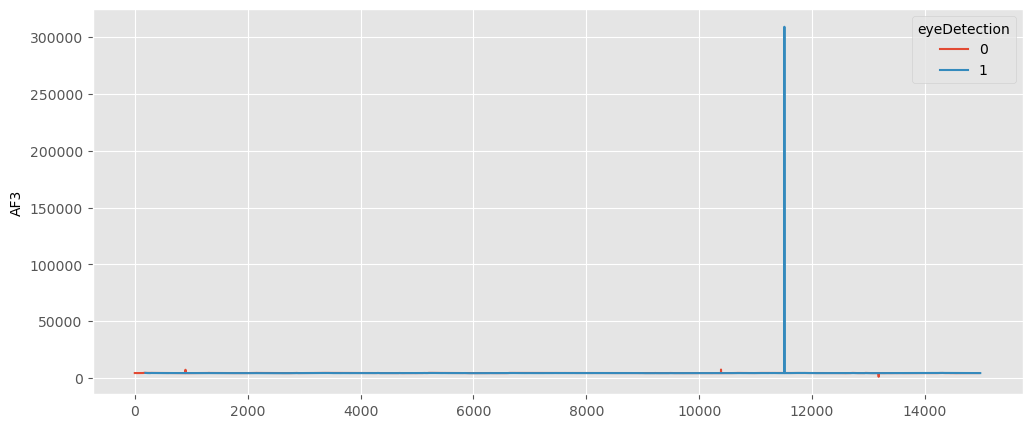

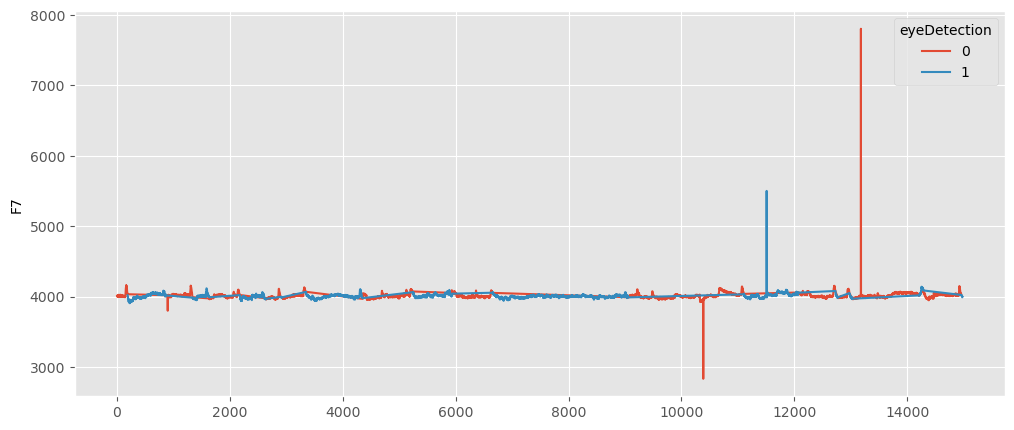

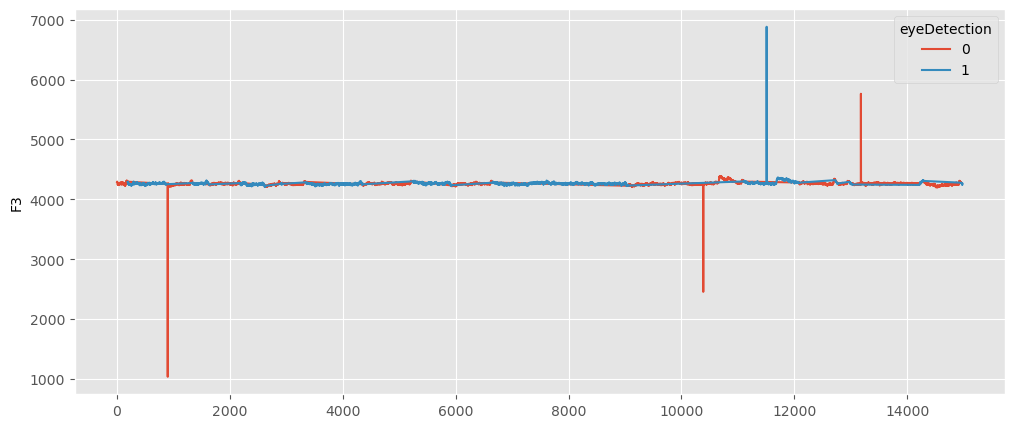

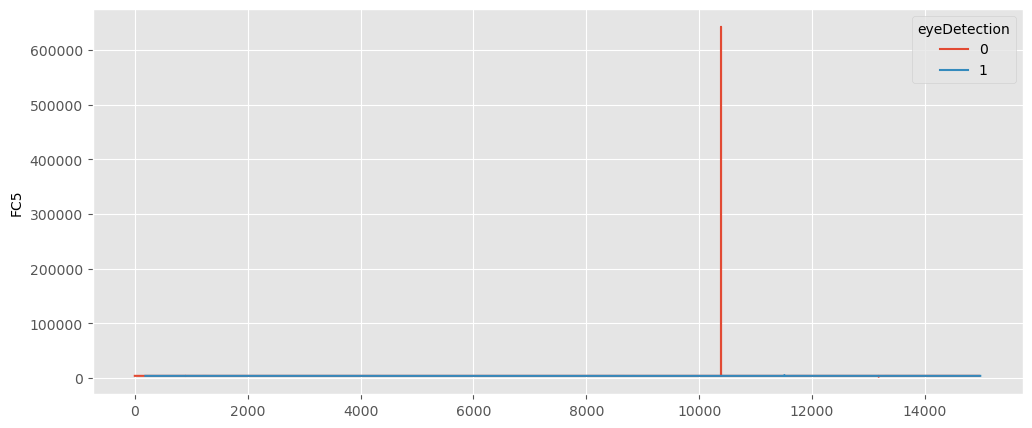

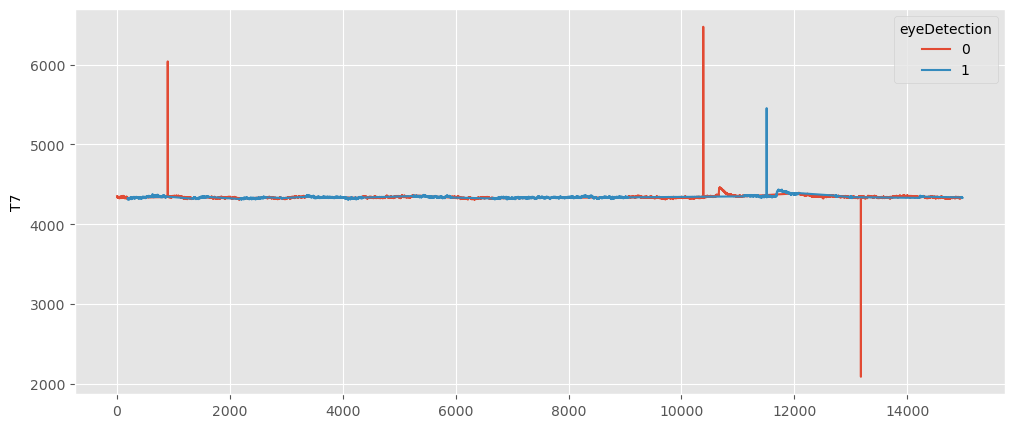

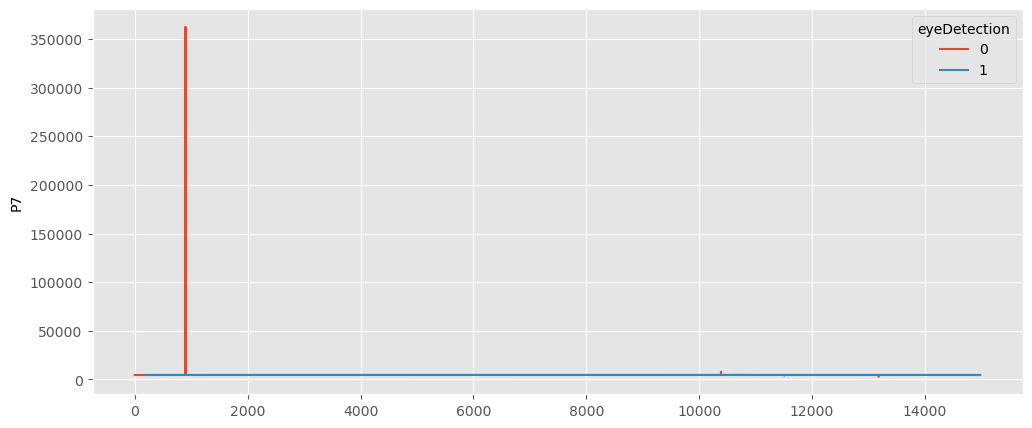

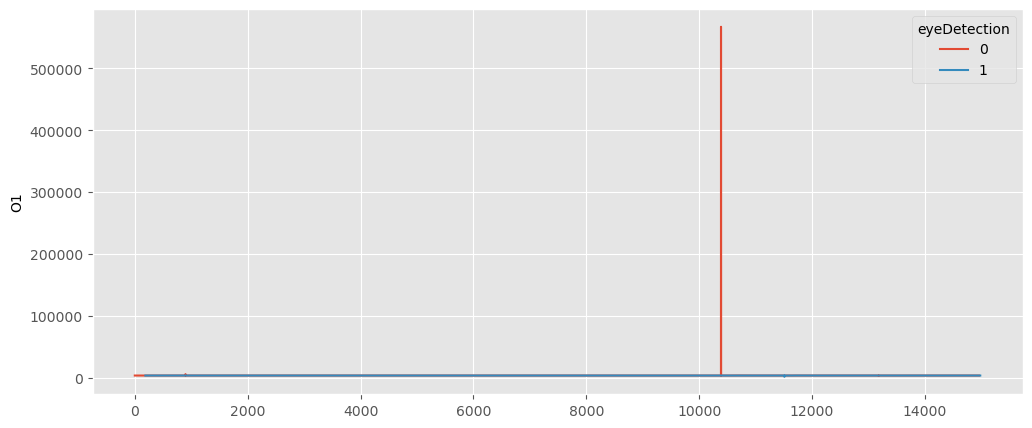

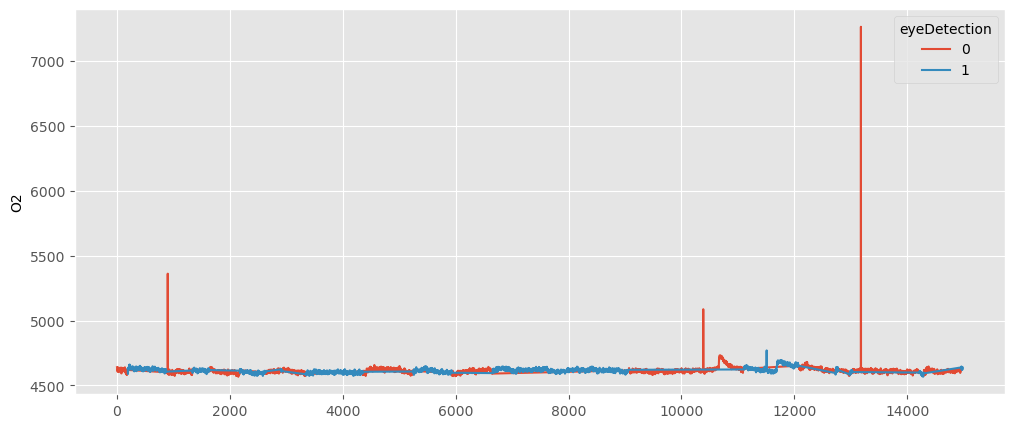

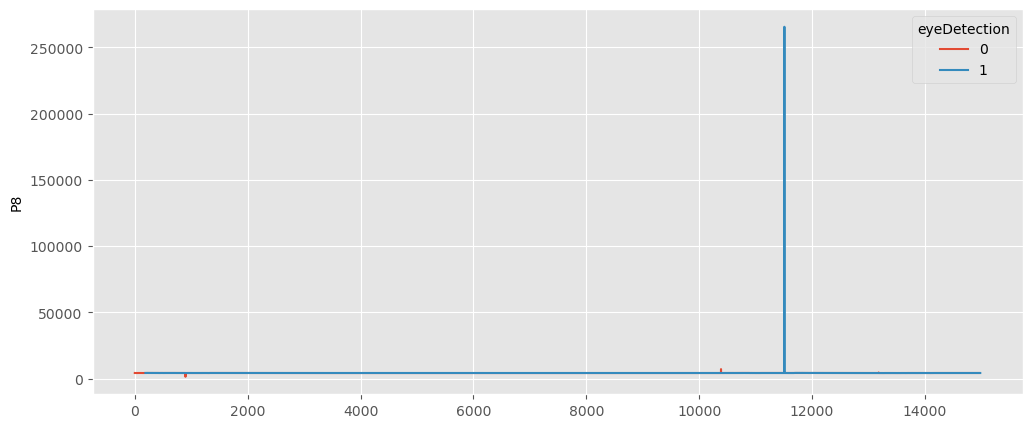

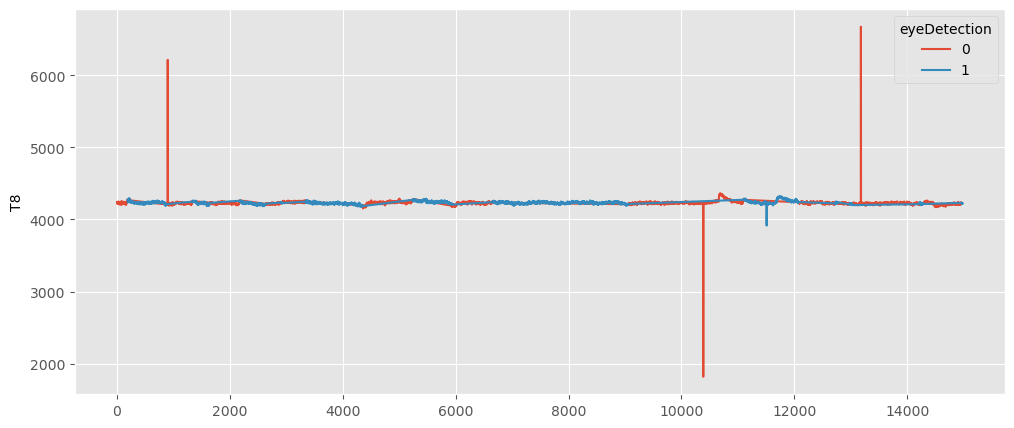

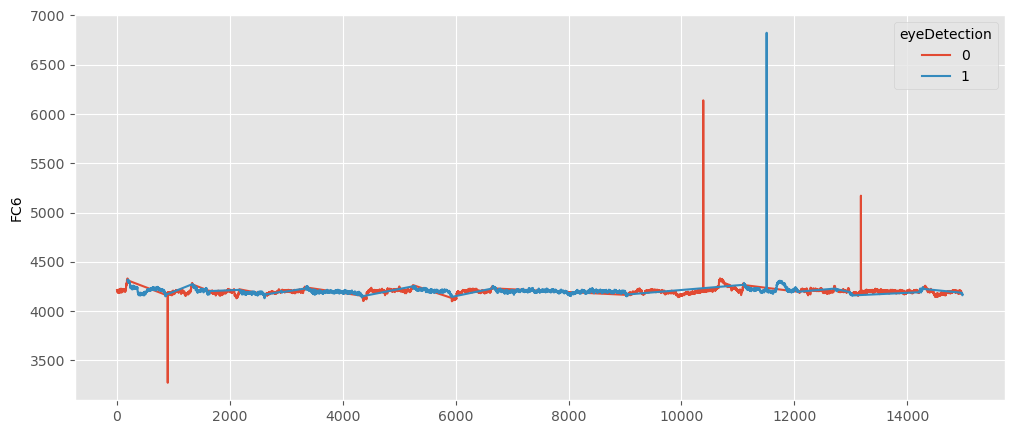

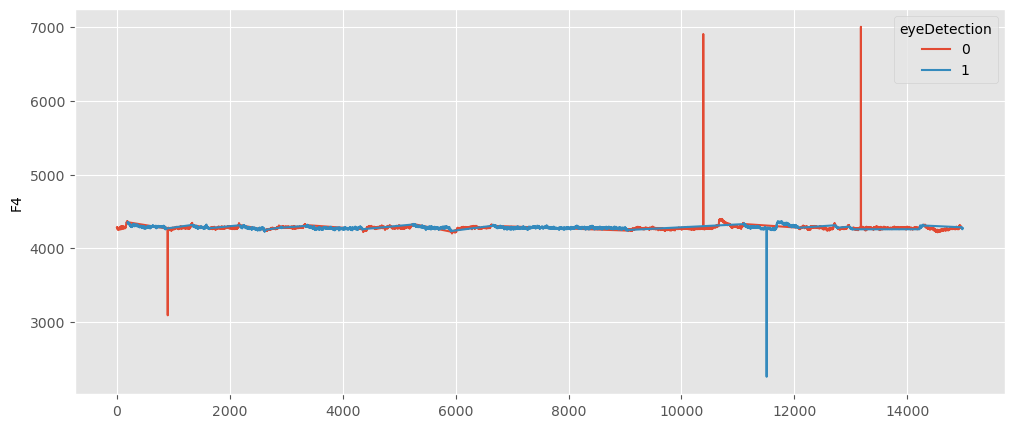

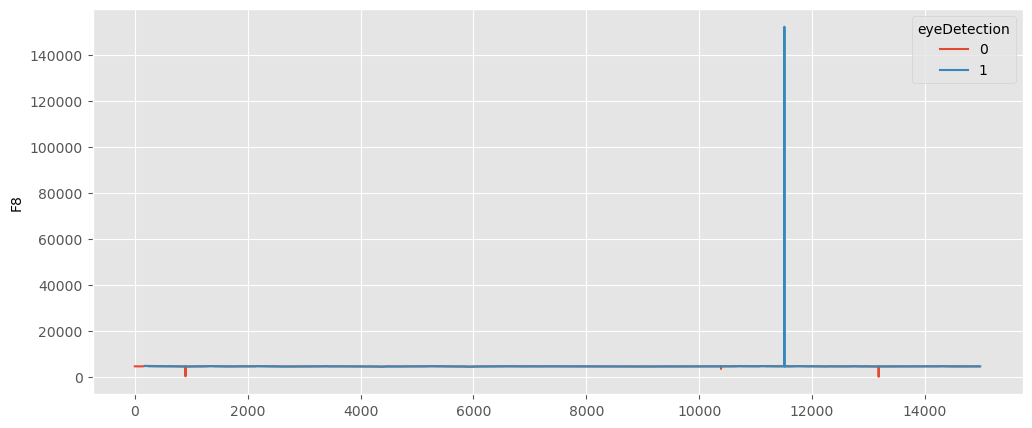

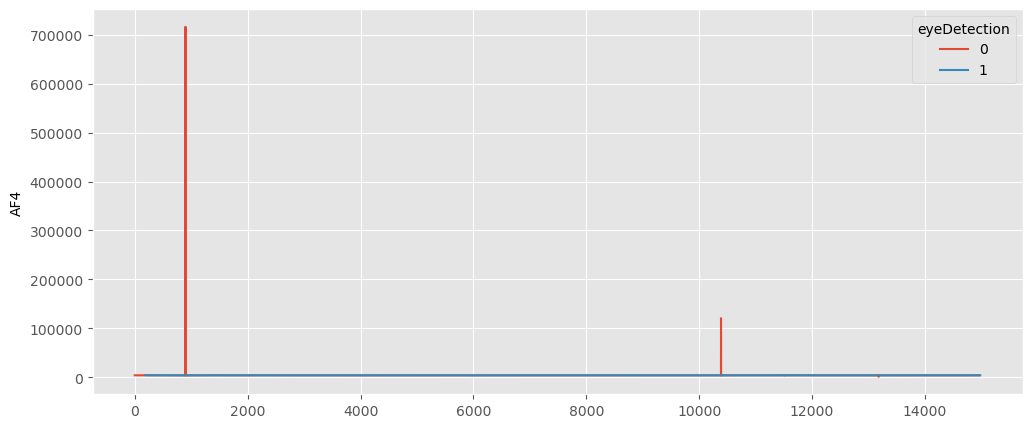

In [36]:
for col in df.columns[0:-1]:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=df.index, y=col, data=df, hue="eyeDetection")
    plt.show()

In [37]:
z_scores = stats.zscore(df)

In [38]:
abs_z_scores = np.abs(z_scores)

In [39]:
filtered_entries = (abs_z_scores < 10).all(axis=1)

In [40]:
df_filtered = df[filtered_entries].reset_index(drop=True)

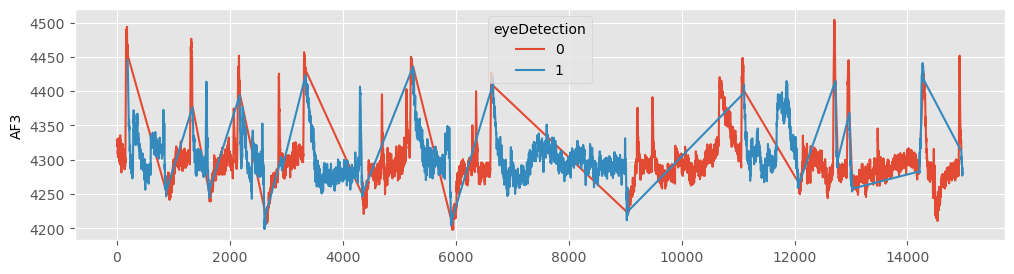

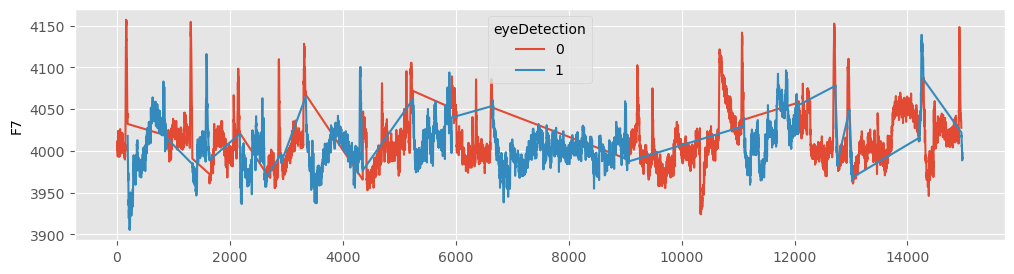

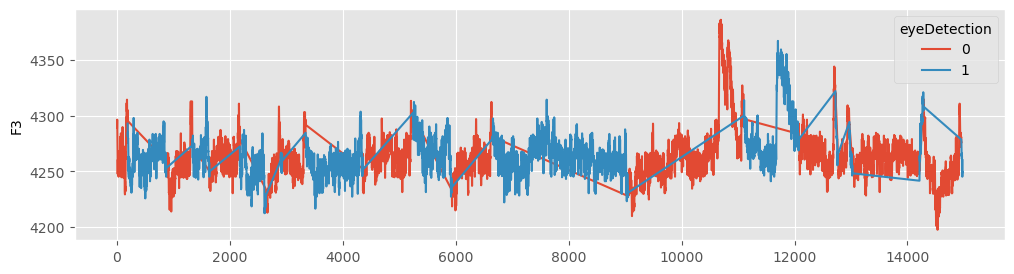

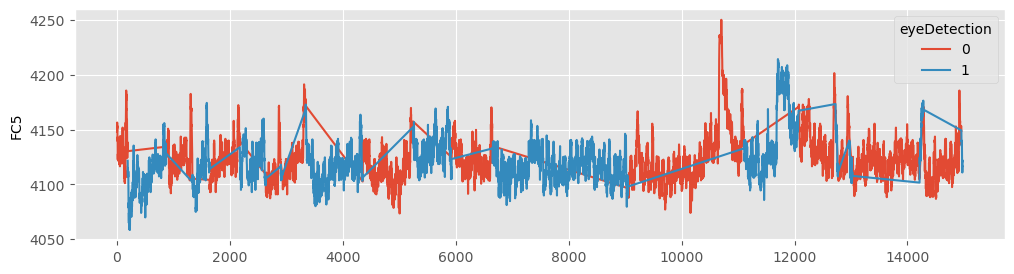

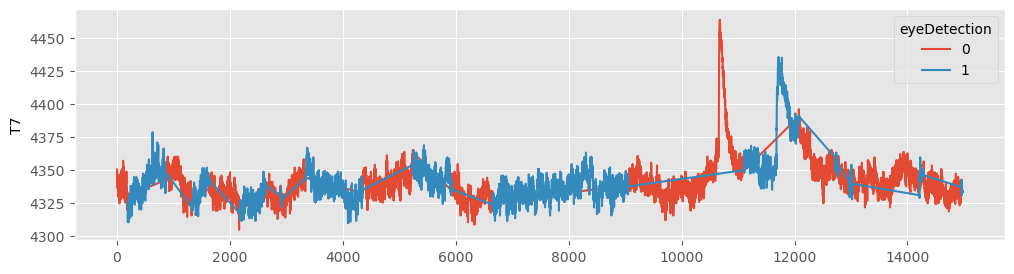

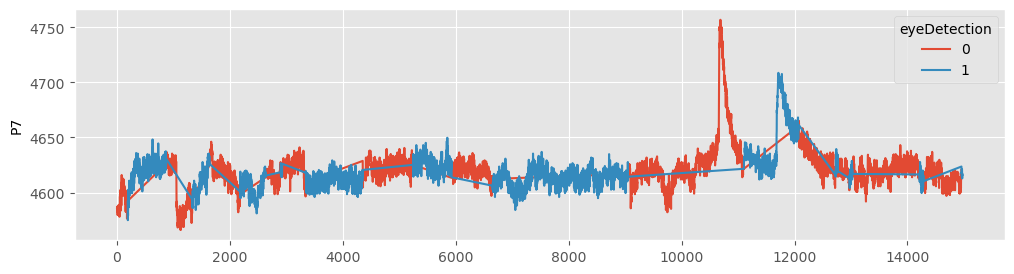

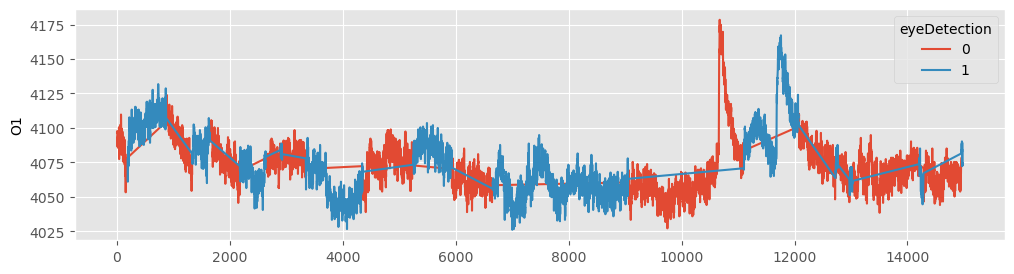

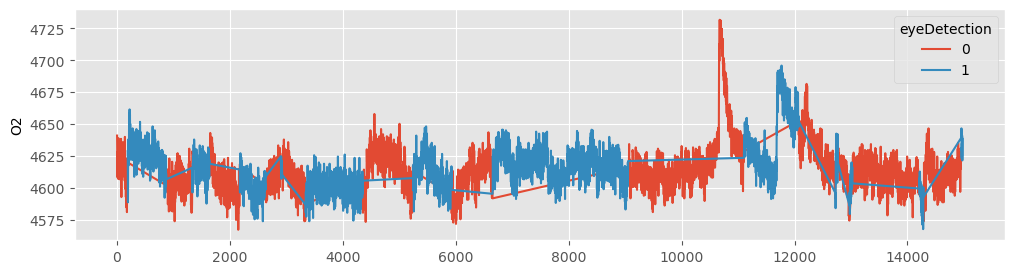

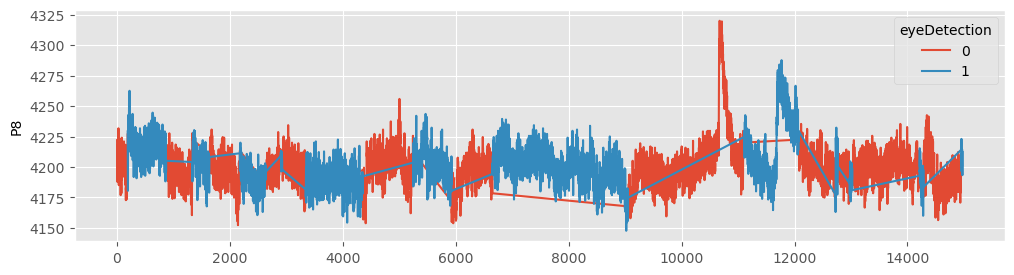

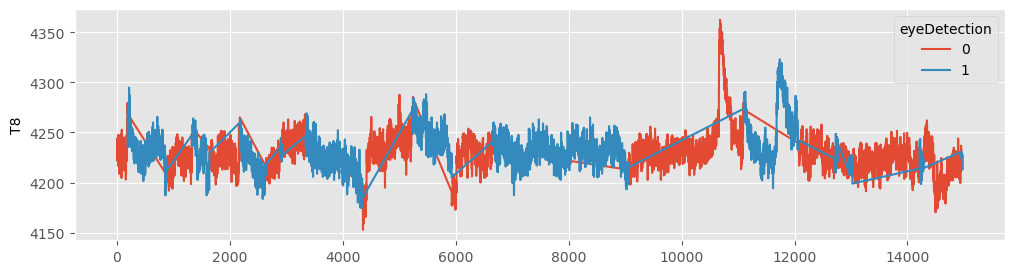

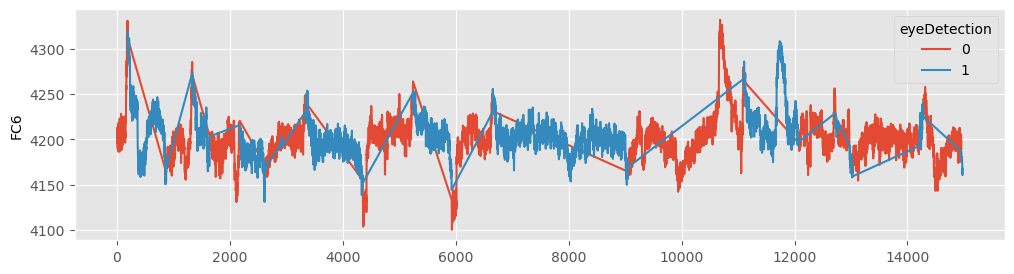

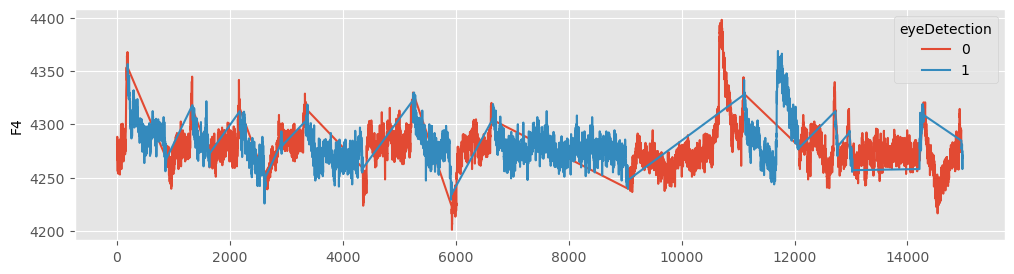

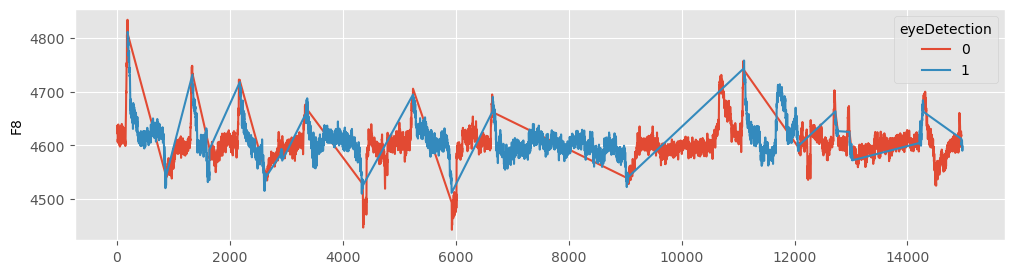

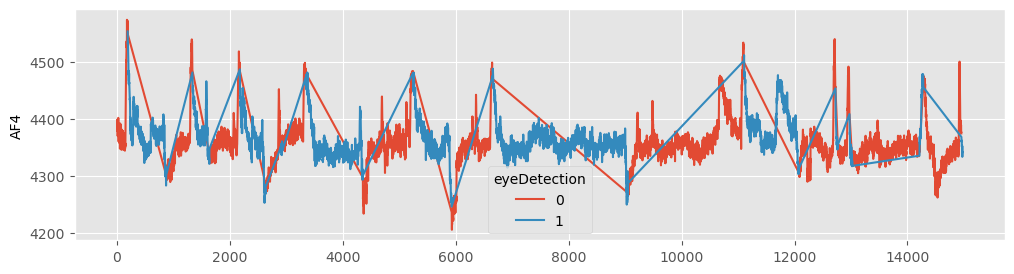

In [41]:
for col in df_filtered.columns[:-1]:
    plt.figure(figsize=(12, 3))
    sns.lineplot(x=df_filtered.index, y=col, data=df_filtered, hue="eyeDetection")
    plt.show()

In [42]:
X = df.drop(columns='eyeDetection')
Y = df['eyeDetection']

In [43]:
X = stats.zscore(X, axis=0)
X[np.abs(X) > 4] = np.nan
X = stats.zscore(X, axis=0, nan_policy='omit')
X[np.abs(X) > 4] = np.nan

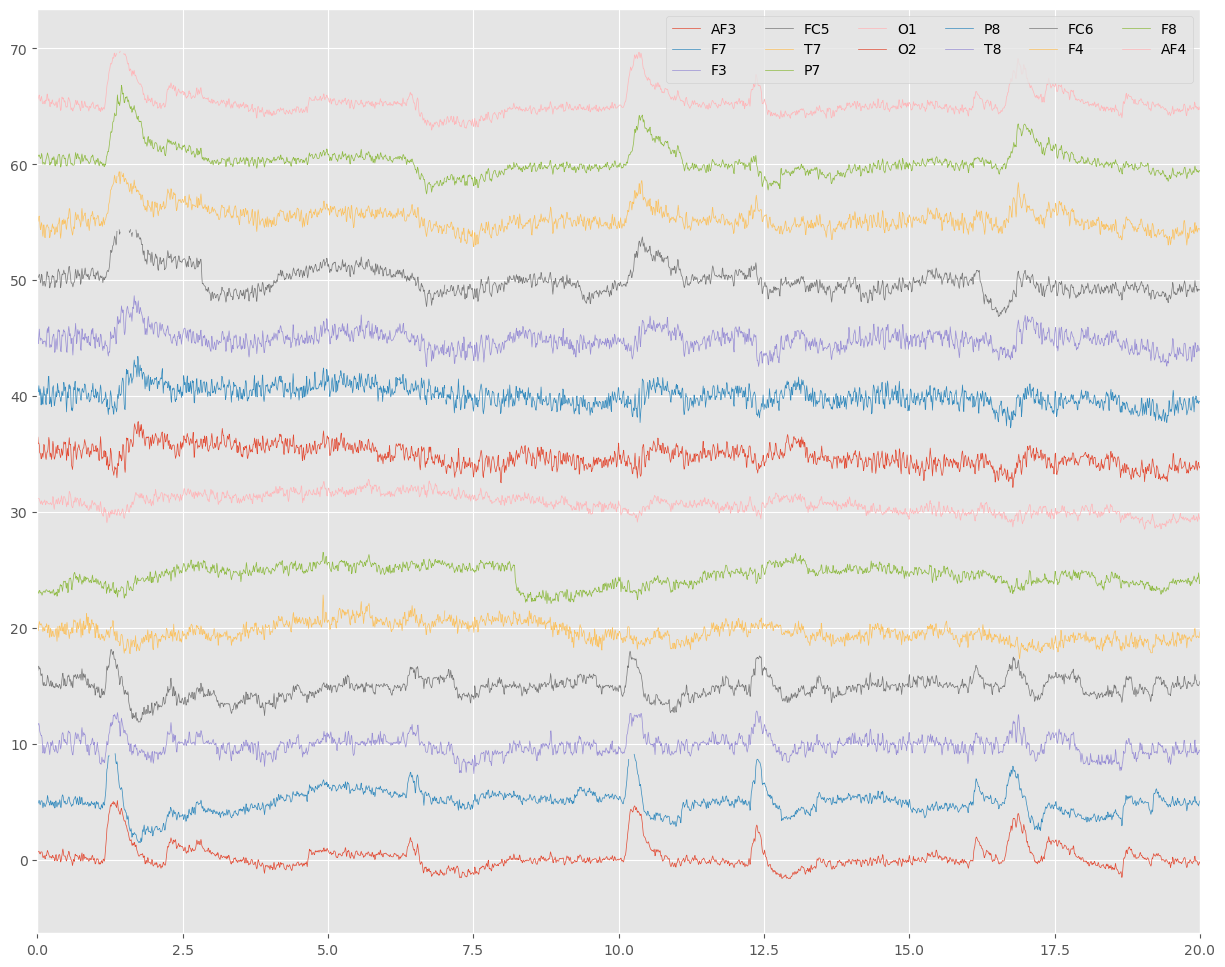

In [44]:
eeg_data_chart([X])

In [45]:
def process_interpolate(x):
    t_temp = t[ x.index[ ~x.isnull() ] ]
    x = x[ x.index[ ~x.isnull() ] ]
    clf = interpolate.interp1d(t_temp, x, kind='cubic')
    return clf(t)

In [46]:
X_interpolate = X.apply(process_interpolate, axis=0)

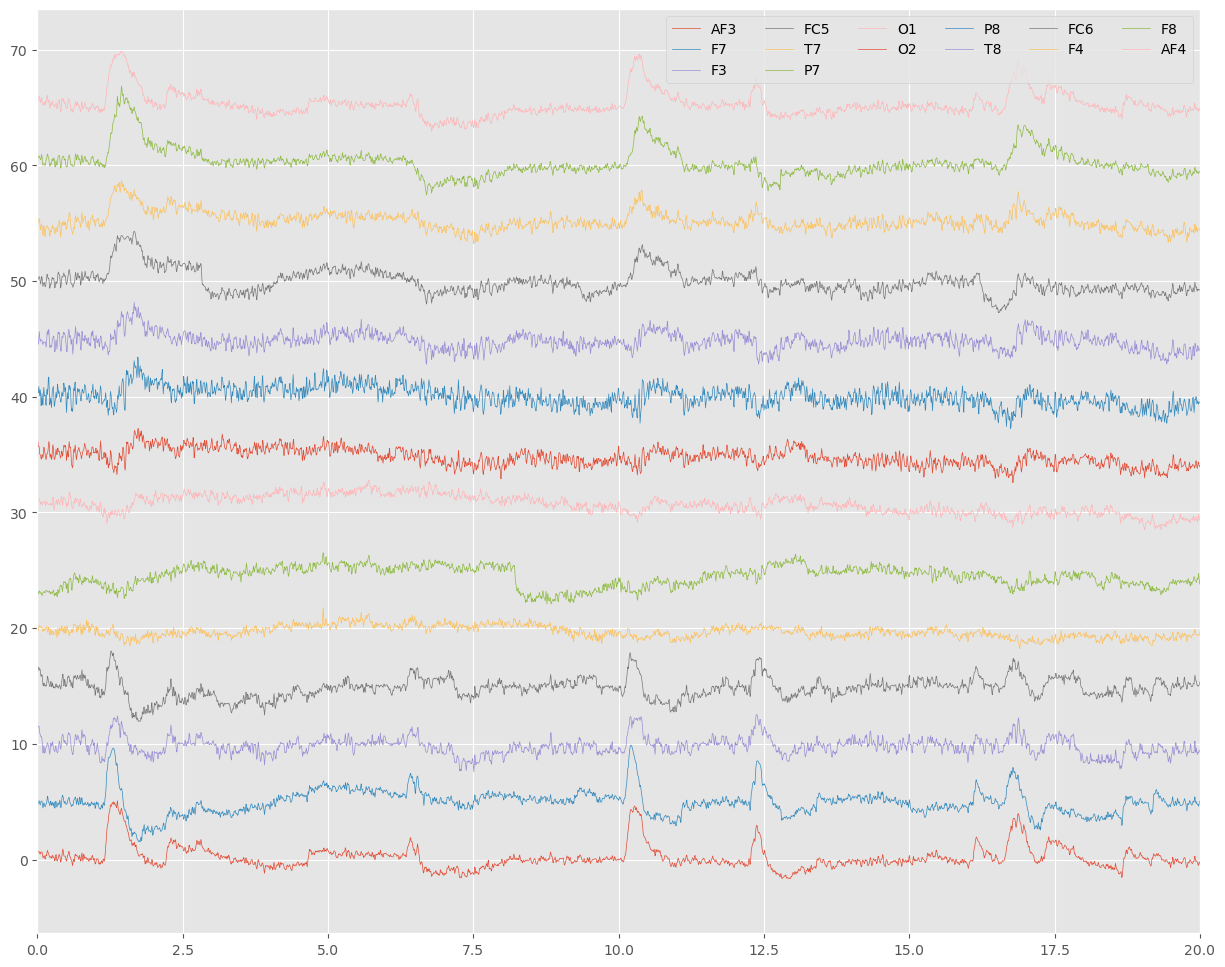

In [47]:
eeg_data_chart([X_interpolate])

In [48]:
ica = FastICA(max_iter=2000, random_state=0)

In [49]:
X_pcs = pd.DataFrame( ica.fit_transform(X_interpolate) )

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning:

Starting in v1.3, whiten='unit-variance' will be used by default.



In [50]:
X_pcs.columns = ['PC' + str(ind+1) for ind in range(X_pcs.shape[-1])]

In [51]:
X_pcs = X_pcs.drop(columns=['PC1', 'PC7'])

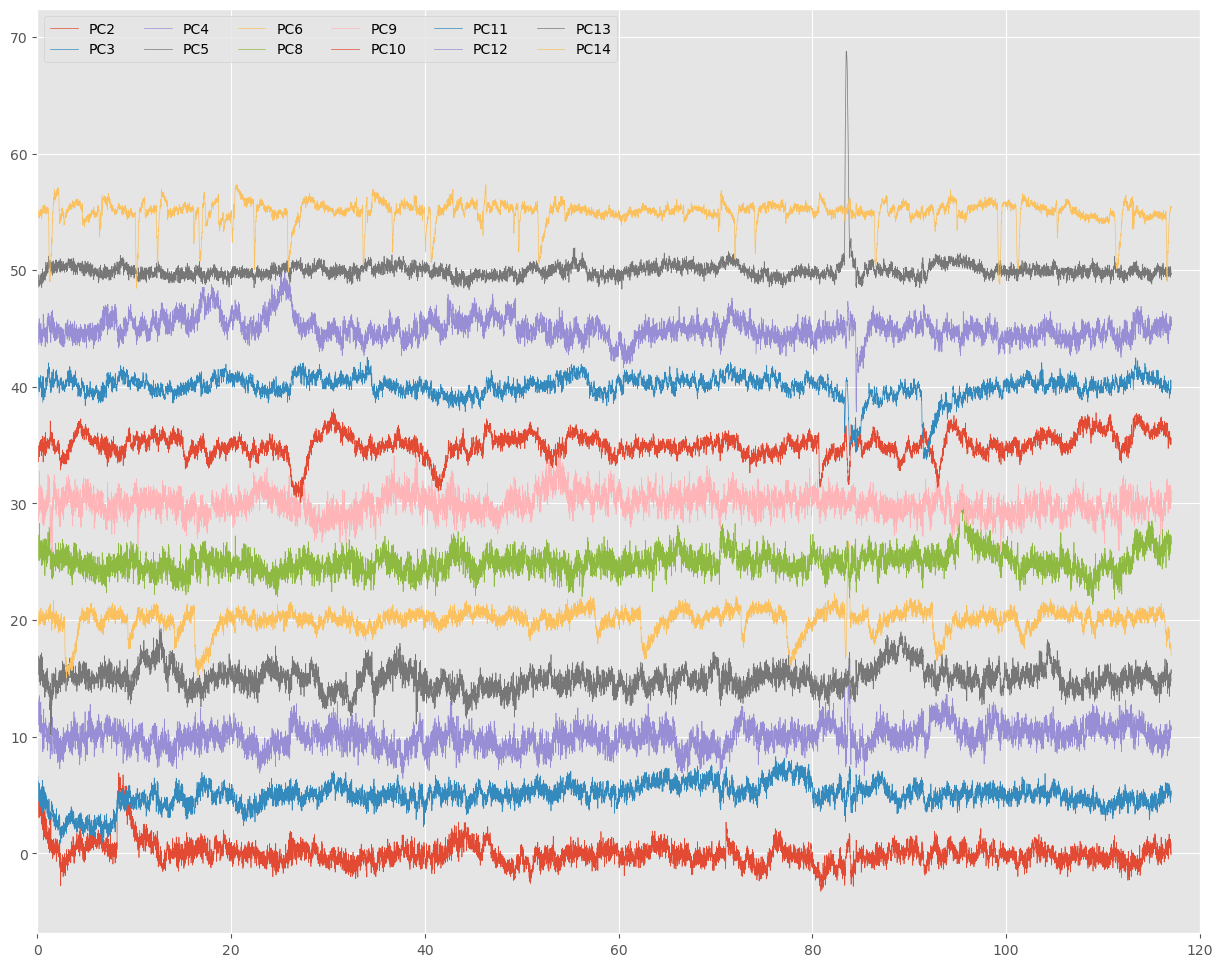

In [52]:
eeg_data_chart([X_pcs], xlim=[0, 120])

In [53]:
ica.mixing_ = np.delete(ica.mixing_, [0, 6], axis = 1)

In [54]:
X_interpolate_clean = pd.DataFrame( ica.inverse_transform(X_pcs) )

In [55]:
X_interpolate_clean.columns = ds_columns

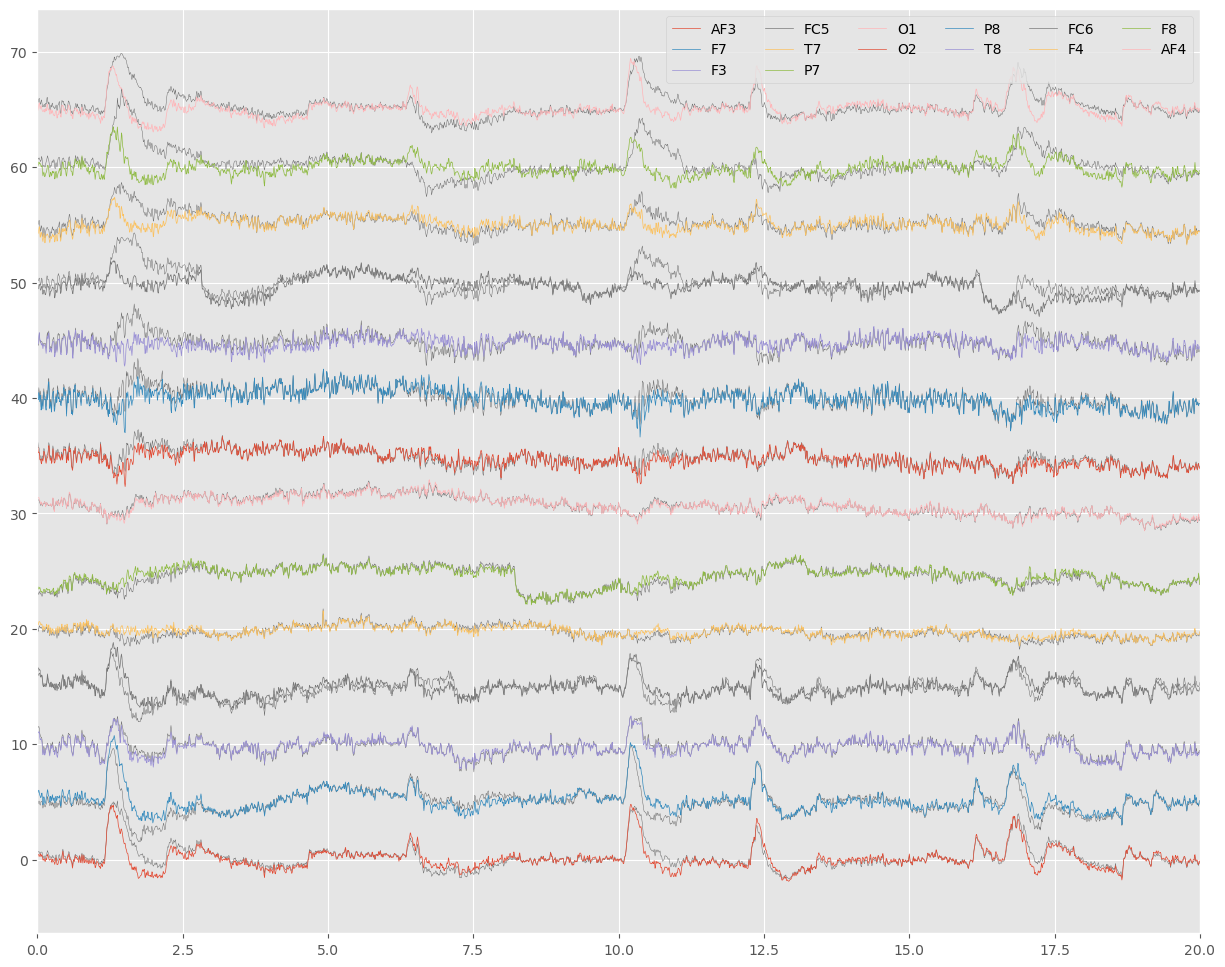

In [56]:
eeg_data_chart([X_interpolate, X_interpolate_clean], xlim=[0, 20])

In [57]:
b, a = signal.butter(6, [8 / 128 * 2, 12 / 128 * 2], btype='bandpass')

In [58]:
X_interp_clean_alpha = X_interpolate_clean.apply(lambda x: signal.filtfilt(b, a, x) / max(abs(signal.filtfilt(b, a, x))) * max(abs(x)), axis=0)

In [59]:
X_interp_clean_alpha = X_interp_clean_alpha.apply(lambda x: np.abs(signal.hilbert(x)), axis=0)

In [60]:
X_interp_clean_alpha.columns = ds_columns

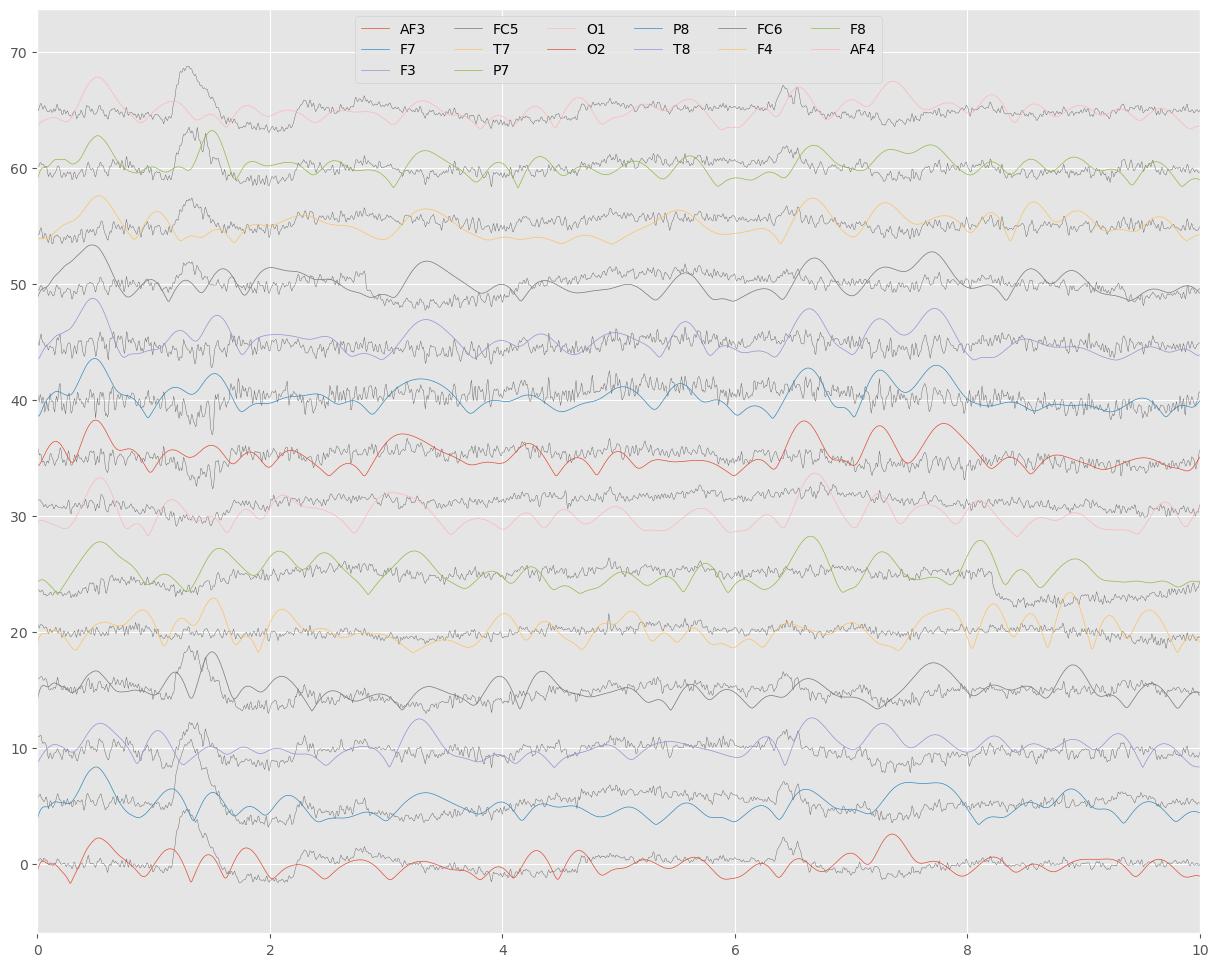

In [61]:
eeg_data_chart([X_interpolate_clean, X_interp_clean_alpha], xlim=[0, 10])

In [62]:
corr_matrix = df.corr().round(2)

In [63]:
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

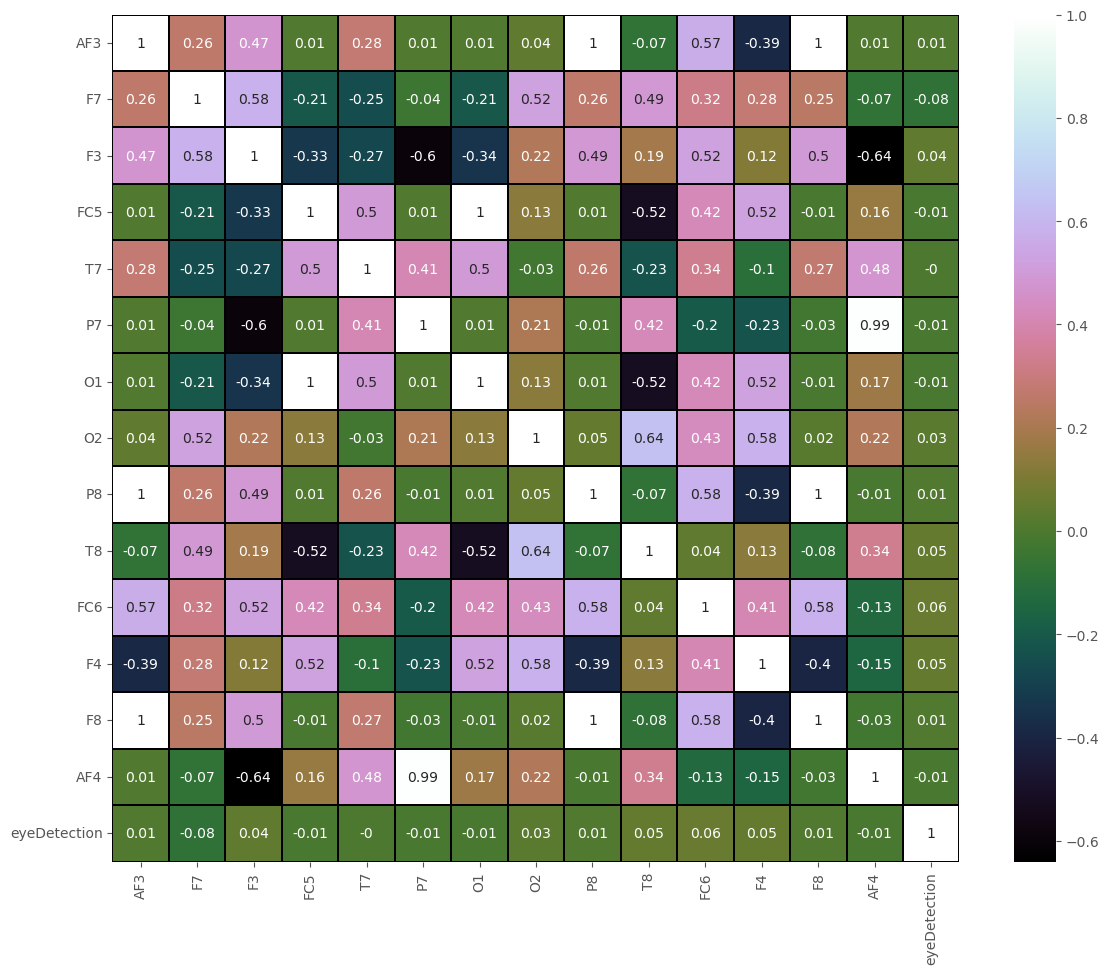

In [64]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center='light', as_cmap=True)
plt.figure(figsize=(14, 11))
sns.heatmap(corr_matrix,  linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.show()

In [65]:
X = df.drop(columns='eyeDetection')
Y = df['eyeDetection']

In [66]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [67]:
np.any(np.isnan(X))

False

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [69]:
rf_clf = RandomForestClassifier(random_state=0)

In [70]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [71]:
y_pred = rf_clf.predict(X_test)

In [72]:
rf_clf_acc = accuracy_score(y_test, y_pred) * 100

In [73]:
display(HTML("<h6 class='messagebox messagelightgreen'>Random Forest Model accuracy score with doors variable removed :  <b>{0:0.4f} %</b></h6>".format(rf_clf_acc)))

In [74]:
cm_rf = confusion_matrix(y_test,y_pred)

<Axes: title={'center': 'Random Forest Confusion Matrix'}>

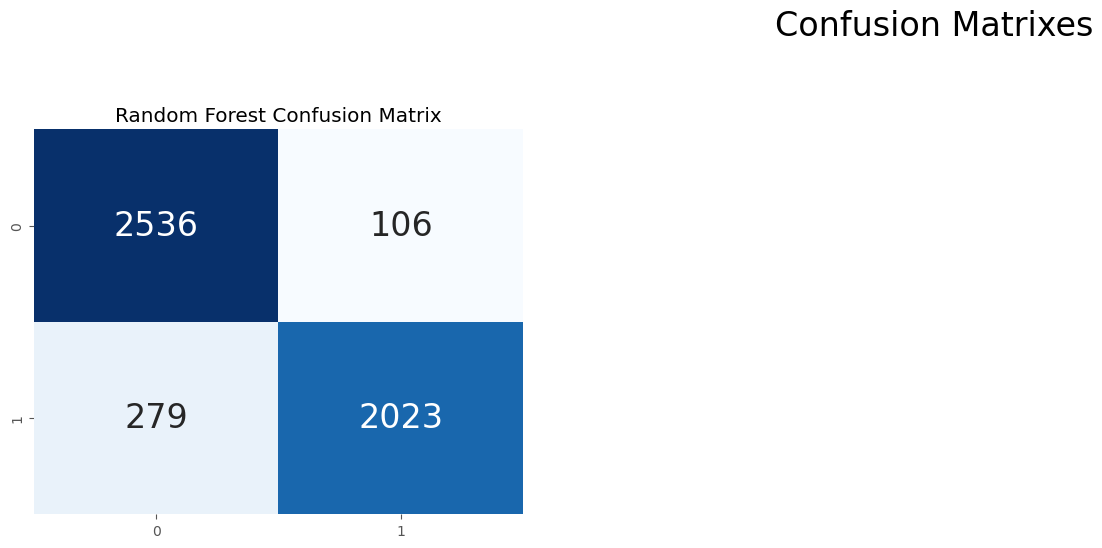

In [75]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2642
           1       0.95      0.88      0.91      2302

    accuracy                           0.92      4944
   macro avg       0.93      0.92      0.92      4944
weighted avg       0.92      0.92      0.92      4944



In [77]:
ab_clf = AdaBoostClassifier(n_estimators=200, learning_rate=1.4)

In [78]:
ab_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.4, n_estimators=200)

In [79]:
y_pred = ab_clf.predict(X_test)

In [80]:
ab_clf_acc = accuracy_score(y_test, y_pred) * 100

In [81]:
display(HTML("<h6 class='messagebox messagelightgreen'>Ada Boost Model accuracy score with doors variable removed :  <b>{0:0.4f} %</b></h6>".format(ab_clf_acc)))

In [82]:
cm_ab = confusion_matrix(y_test,y_pred)

<Axes: title={'center': 'Ada Boost Confusion Matrix'}>

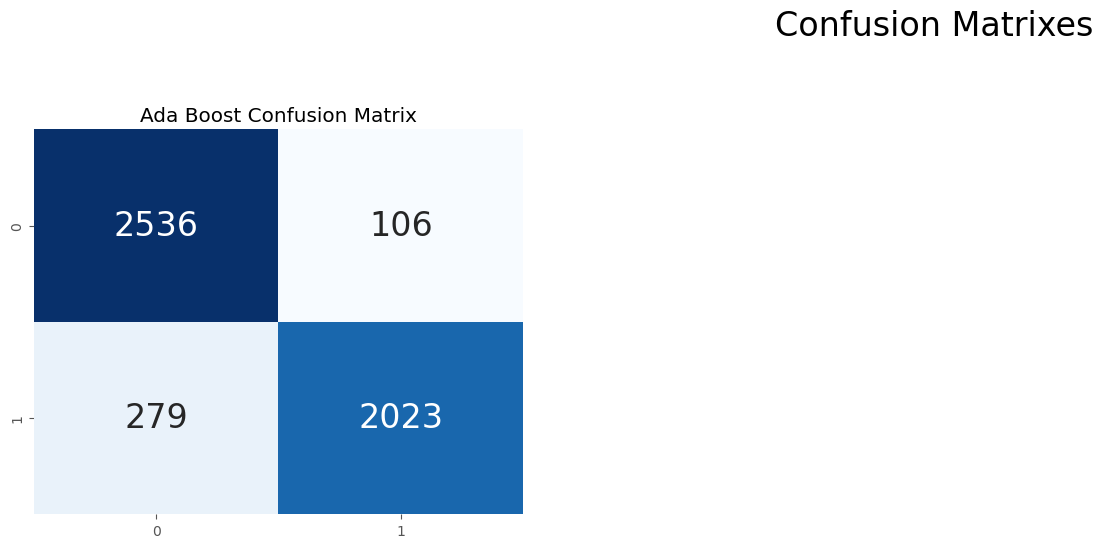

In [83]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,1)
plt.title("Ada Boost Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [85]:
rf_clf = RandomForestClassifier(random_state=0)

In [86]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this par

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [87]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [88]:
best_params

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [89]:
best_score 

0.9179962759822692

In [90]:
best_rf_clf = RandomForestClassifier(random_state=0, **best_params)
best_rf_clf.fit(X_train, y_train)

/Users/kashyapbastola/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(max_features='auto', n_estimators=200, random_state=0)

In [91]:
y_pred = best_rf_clf.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [93]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9179962759822692
Accuracy: 0.9259708737864077
Confusion Matrix:
[[2537  105]
 [ 261 2041]]


In [94]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [95]:
from skopt import BayesSearchCV

In [96]:
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (1, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (0.1, 1.0, 'uniform')
}

In [97]:
rf_clf = RandomForestClassifier(random_state=0)

In [98]:
bayes_search = BayesSearchCV(
    estimator=rf_clf,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    random_state=0
)
bayes_search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
              random_state=0,
              search_spaces={'max_depth': (1, 20),
                             'max_features': (0.1, 1.0, 'uniform'),
                             'min_samples_leaf': (1, 5),
                             'min_samples_split': (2, 10),
                             'n_estimators': (100, 500)})

In [99]:
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_


In [100]:
best_rf_clf = RandomForestClassifier(random_state=0, **best_params)
best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=0.44990085393694423,
                       n_estimators=500, random_state=0)

In [101]:
y_pred = best_rf_clf.predict(X_test)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the best parameters, best score, accuracy, and confusion matrix
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)

Best Parameters: OrderedDict([('max_depth', 19), ('max_features', 0.44990085393694423), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
Best Score: 0.9189927881895438
Accuracy: 0.9235436893203883
Confusion Matrix:
[[2527  115]
 [ 263 2039]]
